In [1]:
#import nltk
import random
import logging
import pandas as pd
import tensorflow as tf
from tensorflow import keras

#nltk.download("punkt")
# Only log error messages
tf.get_logger().setLevel(logging.ERROR)
# Set random seed
tf.keras.utils.set_random_seed(42)

2023-04-21 15:20:21.014951: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-21 15:20:21.618303: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib:/usr/local/cuda/lib:/usr/local/cuda/lib64:
2023-04-21 15:20:21.618361: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib:/usr/local/cuda/lib:/usr/local/cuda/lib64:
2023-04-21 15:

In [4]:
from pathlib import Path

from tokenizers import ByteLevelBPETokenizer


paths = "/home/john_zhang/EEG_NLP/flattened_list.txt"

# Initialize a tokenizer
tokenizer = ByteLevelBPETokenizer()

# Customize training
tokenizer.train(files=paths, vocab_size=52_000, min_frequency=2, special_tokens=[
    "<s>",
    "<pad>",
    "</s>",
    "<unk>",
    "<mask>",
])

# Save files to disk
tokenizer.save_model(".", "esperberto")

['./esperberto-vocab.json', './esperberto-merges.txt']

In [6]:
tokenizer.save_model("./esperberto", "esperberto")

['./esperberto/esperberto-vocab.json', './esperberto/esperberto-merges.txt']

In [3]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

s = 1000
TOKEN_LENGTH = 30 #ms
WORD_LENGTH = 10*s #s
SENTENCE_LENGTH = 100*s #s

TOKENIZER_BATCH_SIZE = 256


In [1]:
import pickle
# with open('sam_dataset.pkl', 'wb') as f:
#     pickle.dump(train_data, f)
with open('../sam_dataset.pkl', 'rb') as f:
    train_data = pickle.load(f)

In [14]:
file_path = "train.txt"  # Path to the output file
train_data1 = train_data[0:int(len(train_data)*0.8)]
tmp = train_data[int(len(train_data)*0.8):]
test_data1 = tmp[0:int(len(tmp)*0.5)]

val_data1 = tmp[int(len(tmp)*0.5):]
with open(file_path, "w") as file:
    for row in train_data1:
        # Convert each element in the row to a string and join them with a delimiter
        line = "".join(str(elem) for elem in row)
        file.write(line + "\n")
print(len(train_data1))
file_path = "test.txt" 
with open(file_path, "w") as file:
    for row in test_data1:
        # Convert each element in the row to a string and join them with a delimiter
        line = "".join(str(elem) for elem in row)
        file.write(line + "\n")
print(len(test_data1))
file_path = "val.txt" 
with open(file_path, "w") as file:
    for row in val_data1:
        # Convert each element in the row to a string and join them with a delimiter
        line = "".join(str(elem) for elem in row)
        file.write(line + "\n")
print(len(val_data1))

2052
256
257


In [12]:
t = tokenizer.encode(train_data[0][0])

In [28]:
maxcout = 0
num_ones = 0
counts = []
for i in range(len(train_data)):
    for t in train_data[i]:
        en = tokenizer.encode(t)
        num_ones += tf.reduce_sum(tf.cast(tf.equal(en.ids, 1), tf.int32))
        counts.append(len(en.ids))
        if len(en.ids) > maxcout:
            maxcout = len(en.ids)

In [27]:
print(num_ones)


tf.Tensor(0, shape=(), dtype=int32)


<BarContainer object of 137355 artists>

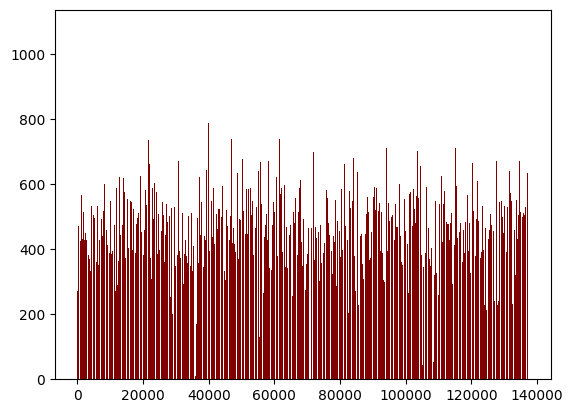

In [31]:

import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset

 
# creating the bar plot
plt.bar(range(len(counts)),counts, color ='maroon')

In [32]:
sum(counts)/len(counts)

464.4852244184777

In [15]:

from tokenizers.implementations import ByteLevelBPETokenizer
from tokenizers.processors import BertProcessing


tokenizer = ByteLevelBPETokenizer(
    "/home/john_zhang/EEG_NLP/llm_for_eeg/esperberto/esperberto-vocab.json",
    "/home/john_zhang/EEG_NLP/llm_for_eeg/esperberto/esperberto-merges.txt",
 
)

In [16]:

tokenizer.enable_truncation(max_length=512)
tokenizer.save_model("tok2", "tok2")


['tok2/tok2-vocab.json', 'tok2/tok2-merges.txt']

In [18]:
from transformers import BertTokenizer
tokenizer_folder = "/home/john_zhang/EEG_NLP/llm_for_eeg/tok2"

tokenizer = BertTokenizer.from_pretrained(tokenizer_folder, return_special_tokens_mask=True, max_length=512)  

#tokenizer.save_pretrained(tokenizer_folder)

OSError: Can't load tokenizer for '/home/john_zhang/EEG_NLP/llm_for_eeg/tok2'. If you were trying to load it from 'https://huggingface.co/models', make sure you don't have a local directory with the same name. Otherwise, make sure '/home/john_zhang/EEG_NLP/llm_for_eeg/tok2' is the correct path to a directory containing all relevant files for a BertTokenizer tokenizer.

In [13]:
from transformers import RobertaTokenizerFast
tokenizer_folder = "./bpe"

tokenizer = RobertaTokenizerFast.from_pretrained(tokenizer_folder, return_special_tokens_mask=True, max_length=512)  

#tokenizer.save_pretrained(tokenizer_folder)

In [18]:

from transformers import RobertaConfig

config = RobertaConfig(
    vocab_size=52_000,
    max_position_embeddings=514,
    num_attention_heads=1,
    num_hidden_layers=1,
    type_vocab_size=1,
    hidden_size = 76,
    intermediate_size = 307
)
     

In [19]:
config

RobertaConfig {
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 76,
  "initializer_range": 0.02,
  "intermediate_size": 307,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 1,
  "num_hidden_layers": 1,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.28.0.dev0",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 52000
}

In [20]:

from transformers import RobertaModel

model = RobertaModel(config=config)

In [17]:
model.num_parameters()

4067903

In [12]:
from transformers import LineByLineTextDataset

# dataset = LineByLineTextDataset(
#     tokenizer=tokenizer,
#     file_path="../tmp_data.txt",
#     block_size=128,
# )

dataset = LineByLineTextDataset(
    tokenizer=tokenizer,
    file_path="output.txt",
    block_size=128,
)

2023-05-12 14:47:36.645189: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-12 14:47:37.925121: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib:/usr/local/cuda/lib:/usr/local/cuda/lib64:
2023-05-12 14:47:37.925199: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib:/usr/local/cuda/lib:/usr/local/cuda/lib64:
2023-05-12 14:

RuntimeError: Failed to import transformers.data.datasets because of the following error (look up to see its traceback):
/home/john_zhang/.conda/envs/eeg_nlp/lib/python3.9/site-packages/torch/lib/libtorch_cuda.so: undefined symbol: cudaGraphDebugDotPrint, version libcudart.so.11.0

In [25]:
dataset.keys()

AttributeError: 'LineByLineTextDataset' object has no attribute 'keys'

In [26]:
from transformers import DataCollatorForLanguageModeling

data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm=True, mlm_probability=0.15
)

In [ ]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="./EsperBERTo",
    overwrite_output_dir=True,
    num_train_epochs=1,
    per_gpu_train_batch_size=64,
    save_steps=10_000,
    save_total_limit=2,
    prediction_loss_only=True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=dataset,
)
     